In [70]:
from pandas import  *
from seaborn import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [71]:
df1=read_csv('test.csv')
df2=read_csv('train.csv')

In [72]:
df=concat([df1,df2],axis=0,ignore_index=True)

In [73]:
df

,Weight,Height
0,66,5.5
1,65,5.3
2,69,5.9
3,70,6.2
4,73,6.8
5,40,4.0
6,46,4.5
7,50,4.7
8,60,5.0
9,62,5.1


In [74]:
x=(df['Weight'])
y=(df['Height'])

In [75]:
x=array(x).reshape(-1,1)

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=90)

In [77]:
r=LinearRegression()
r.fit(x_train,y_train)

LinearRegression()

In [78]:
r.score(x_train,y_train) 

0.91930185827506

In [79]:
r.score(x_test,y_test)

-5.058930445486889

In [80]:
r.predict([[69.5]])

array([6.07366342])

In [81]:
df

,Weight,Height
0,66,5.5
1,65,5.3
2,69,5.9
3,70,6.2
4,73,6.8
5,40,4.0
6,46,4.5
7,50,4.7
8,60,5.0
9,62,5.1


In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
r2 = PolynomialFeatures(degree=15)
x2_train = r2.fit_transform(x_train)
x2_test = r2.fit_transform(x_test)
    
    # Fit linear regression model
r = LinearRegression()
r.fit(x2_train, y_train)

LinearRegression()

In [84]:
r.score(x2_test,y_test)

0.9956114614062253

In [85]:
r.score(x2_train,y_train)

0.9991470750900002

In [86]:
r.predict(r2.fit_transform([[69.5]]))        #perfect prediction wow!

array([6.05617664])

In [87]:
r.predict(r2.fit_transform([[70.3]]))

array([6.25526144])

In [88]:
r.predict(r2.fit_transform([[63.2]]))

array([5.16997809])

Degree 1: Train Score = 0.8441344678476774, Test Score = 0.8166782152566922
Degree 2: Train Score = 0.9775963505243633, Test Score = 0.1082818244069903
Degree 3: Train Score = 0.9971877282310067, Test Score = 0.9792470997185602
Degree 4: Train Score = 0.9973886168499836, Test Score = 0.8714292174768914
Degree 5: Train Score = 0.9989621615178236, Test Score = -2.3087736873961817
Degree 6: Train Score = 0.9989779748166211, Test Score = -0.35425707839915765
Degree 7: Train Score = 0.9989928677435811, Test Score = 0.4368811248477765
Degree 8: Train Score = 0.9990779245710898, Test Score = -4.471386903256507
Degree 9: Train Score = 0.9990870551164137, Test Score = -1.1841625034821108
Degree 10: Train Score = 0.999096143274326, Test Score = 0.14478478235916292
Degree 11: Train Score = 0.999105317677004, Test Score = 0.6620170643645085
Degree 12: Train Score = 0.9991147157936131, Test Score = 0.8792365933613414
Degree 13: Train Score = 0.9991246028571696, Test Score = 0.9614618708105162
Degre

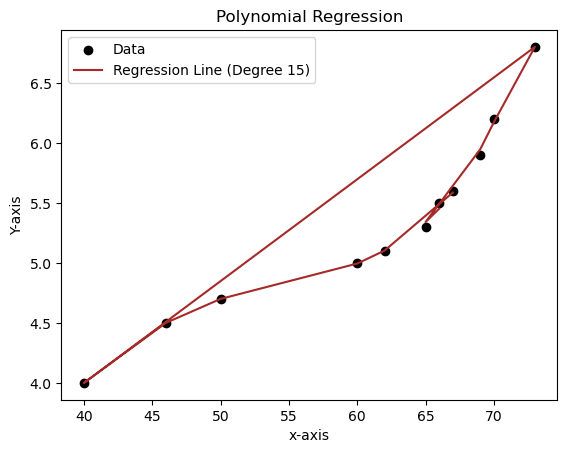

In [89]:
#FOR Polynomial Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming x is your features and y is your target
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Loop through degrees from 1 to 20
degrees = np.arange(1, 21)
train_scores = []
test_scores = []

for degree in degrees:
    # Transform features to polynomial features
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    
    # Calculate score on training data
    train_score = model.score(x_train_poly, y_train)
    train_scores.append(train_score)
    
    # Calculate score on testing data
    test_score = model.score(x_test_poly, y_test)
    test_scores.append(test_score)

# Display scores for training and testing data
for deg, train_score, test_score in zip(degrees, train_scores, test_scores):
    print(f"Degree {deg}: Train Score = {train_score}, Test Score = {test_score}")

# Find degree with minimum difference between test and train scores
score_diff = np.abs(np.array(train_scores) - np.array(test_scores))
best_degree_min_diff = np.argmin(score_diff) + 1

print(f"\n\nDegree with minimum difference between test and train scores: {best_degree_min_diff}")

# Plotting the regression line for the degree with the highest test score
best_degree_max_test_score = np.argmax(test_scores) + 1
poly = PolynomialFeatures(degree=best_degree_max_test_score)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

plt.scatter(x, y, color='black', label='Data')
plt.plot(x, model.predict(x_poly), color='brown', label=f'Regression Line (Degree {best_degree_max_test_score})')
plt.xlabel('x-axis')
plt.ylabel('Y-axis')
plt.title('Polynomial Regression')
plt.legend()
plt.show()
